# Parking Log Data Analysis

In [1]:
import sqlite3
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

In [2]:
connection_string :str = "../db.sqlite3"
#get all parking lot logs and parking lot names from the database
sql:str = "SELECT * FROM PerfectParking_parkinglotlog"
sql:str = "SELECT * FROM PerfectParking_parkinglotlog A INNER JOIN PerfectParking_parkinglot B ON A.parking_lot_id = B.id"

In [3]:
connection = sqlite3.connect(connection_string)
dataframe: DataFrame =pandas.read_sql_query(sql, connection)
connection.close()

In [4]:
dataframe.head()

,id,free_parking_spaces,time_stamp,logged_by_monitor_id,parking_lot_id,id,name,address,hours,isPaidParking,latitude,image,parking_spaces,longitude
0,1,3,2023-08-16 19:53:15.525178,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
1,2,3,2023-08-16 19:53:19.249673,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
2,3,3,2023-08-16 19:53:19.664685,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
3,4,3,2023-08-16 19:53:20.025721,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
4,5,3,2023-08-16 19:53:20.466446,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752


In [5]:
dataframe['time_stamp'] = pandas.to_datetime(dataframe['time_stamp'])
dataframe['hour'] = dataframe['time_stamp'].dt.hour


## Visualize the parking lot logs by hour

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 80.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([18.5       , 18.54166667, 18.58333333, 18.625     , 18.66666667,
        18.70833333, 18.75      , 18.79166667, 18.83333333, 18.875     ,
        18.91666667, 18.95833333, 19.        , 19.04166667, 19.08333333,
        19.125     , 19.16666667, 19.20833333, 19.25      , 19.29166667,
        19.33333333, 19.375     , 19.41666667, 19.45833333, 19.5       ]),
 <BarContainer object of 24 artists>)

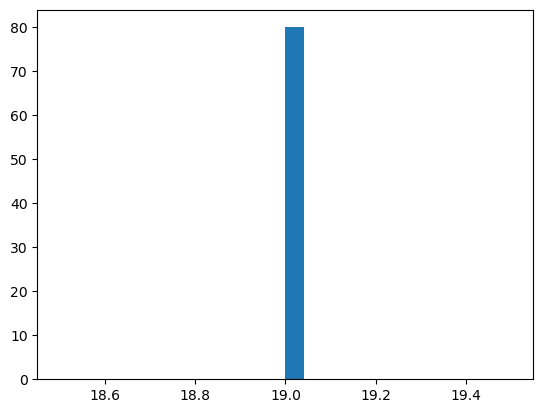

In [6]:
pyplot.hist(dataframe['hour'], bins=24)

# Visualize the busiest parking lots 


(array([ 0.,  0.,  0., 80.,  0.,  0.]),
 array([-0.5       , -0.33333333, -0.16666667,  0.        ,  0.16666667,
         0.33333333,  0.5       ]),
 <BarContainer object of 6 artists>)

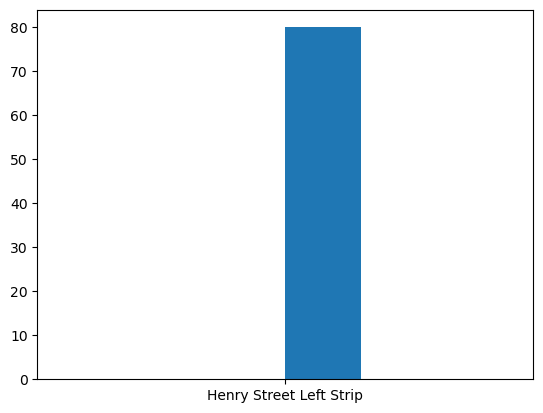

In [7]:
pyplot.hist(dataframe['name'], bins=6)